In [ ]:
pip install seaborn

                                              0.0/293.3 kB ? eta -:--:--
     ----                                    30.7/293.3 kB 1.4 MB/s eta 0:00:01
     ------------                            92.2/293.3 kB 1.1 MB/s eta 0:00:01
     -------------------------              194.6/293.3 kB 1.5 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings .filterwarnings('ignore')

In [ ]:
sample_submission = pd.read_csv('sample_submission.csv')
print(sample_submission.shape)
sample_submission.head()

(325, 2)


,Index,Max drift mm
0,0,18.60
1,1,-1.92
2,2,41.58
3,3,25.69
4,4,-5.01


In [ ]:
test_raw = pd.read_csv('test.csv')
print(test_raw.shape)
test_raw.head()

(325, 22)


,Column fy Mpa,Beam fy Mpa,Columns 1-3 I mm4*10^6,Columns 4-6 I mm4*10^6,Columns 1-3 A mm2,Columns 4-6 A mm2,Beam I mm4*10^6,Spans,Number of floors,Floor height m,...,Floor mass kg,Facade Load kN/m,PGA g,Magnitude,Distance to fault km,Period s,Final Dead Load,Final Live Load,soil_class__B,soil_class__C
0,355.0,355.0,5538.00,4221.000,34685.0,32053.0,231.30,4.0,4.0,3.0,...,17579.6280,4.0,0.354,6.50,15.82,0.216653,7.5,5.0,1.0,0.0
1,355.0,235.0,1119.00,0.000,21176.0,0.0,482.00,5.0,1.0,4.0,...,15968.5020,0.0,0.140,5.90,25.50,0.076358,9.0,6.0,0.0,1.0
2,235.0,235.0,10.33,6.062,3142.0,2534.0,1752.00,1.0,6.0,3.0,...,10531.4616,2.0,0.283,7.28,19.74,2.384245,8.0,12.0,0.0,1.0
3,355.0,235.0,637.20,0.000,17803.0,0.0,231.30,2.0,1.0,3.0,...,165958.2144,4.0,0.300,6.60,10.27,0.337537,21.0,7.0,1.0,0.0
4,275.0,235.0,1119.00,0.000,21176.0,0.0,13.17,1.0,2.0,3.0,...,4496.8770,0.0,0.150,6.20,13.91,0.180089,1.5,6.0,1.0,0.0


In [ ]:
test_raw_index = test_raw.reset_index()
test_raw_index.head()

,index,Column fy Mpa,Beam fy Mpa,Columns 1-3 I mm4*10^6,Columns 4-6 I mm4*10^6,Columns 1-3 A mm2,Columns 4-6 A mm2,Beam I mm4*10^6,Spans,Number of floors,...,Floor mass kg,Facade Load kN/m,PGA g,Magnitude,Distance to fault km,Period s,Final Dead Load,Final Live Load,soil_class__B,soil_class__C
0,0,355.0,355.0,5538.00,4221.000,34685.0,32053.0,231.30,4.0,4.0,...,17579.6280,4.0,0.354,6.50,15.82,0.216653,7.5,5.0,1.0,0.0
1,1,355.0,235.0,1119.00,0.000,21176.0,0.0,482.00,5.0,1.0,...,15968.5020,0.0,0.140,5.90,25.50,0.076358,9.0,6.0,0.0,1.0
2,2,235.0,235.0,10.33,6.062,3142.0,2534.0,1752.00,1.0,6.0,...,10531.4616,2.0,0.283,7.28,19.74,2.384245,8.0,12.0,0.0,1.0
3,3,355.0,235.0,637.20,0.000,17803.0,0.0,231.30,2.0,1.0,...,165958.2144,4.0,0.300,6.60,10.27,0.337537,21.0,7.0,1.0,0.0
4,4,275.0,235.0,1119.00,0.000,21176.0,0.0,13.17,1.0,2.0,...,4496.8770,0.0,0.150,6.20,13.91,0.180089,1.5,6.0,1.0,0.0


In [ ]:
train_raw = pd.read_csv('train.csv')
print(train_raw.shape)
train_raw.head()

(2922, 23)


,Column fy Mpa,Beam fy Mpa,Columns 1-3 I mm4*10^6,Columns 4-6 I mm4*10^6,Columns 1-3 A mm2,Columns 4-6 A mm2,Beam I mm4*10^6,Spans,Number of floors,Floor height m,...,Facade Load kN/m,PGA g,Magnitude,Distance to fault km,Period s,Max drift mm,Final Dead Load,Final Live Load,soil_class__B,soil_class__C
0,275.0,235.0,16.73,10.330,3877.0,3142.0,1119.0,5.0,4.0,4.0,...,3.0,0.171,6.00,17.28,5.178486,35.052122,10.5,7.0,0.0,1.0
1,235.0,235.0,229.30,182.600,12437.0,11253.0,117.7,3.0,6.0,4.0,...,4.0,0.150,6.33,18.96,4.539964,89.310331,12.0,8.0,0.0,1.0
2,275.0,235.0,276.90,0.000,13347.0,0.0,117.7,6.0,3.0,4.0,...,1.0,0.171,6.00,17.28,1.412026,31.485753,15.0,10.0,0.0,1.0
3,235.0,235.0,10.33,6.062,3142.0,2534.0,920.8,6.0,6.0,3.0,...,1.0,0.283,7.28,19.74,2.490511,27.250323,4.0,10.0,0.0,1.0
4,355.0,355.0,330.90,0.000,14276.0,0.0,920.8,3.0,2.0,4.0,...,4.0,0.171,6.00,17.28,0.313426,5.109617,8.0,4.0,0.0,1.0


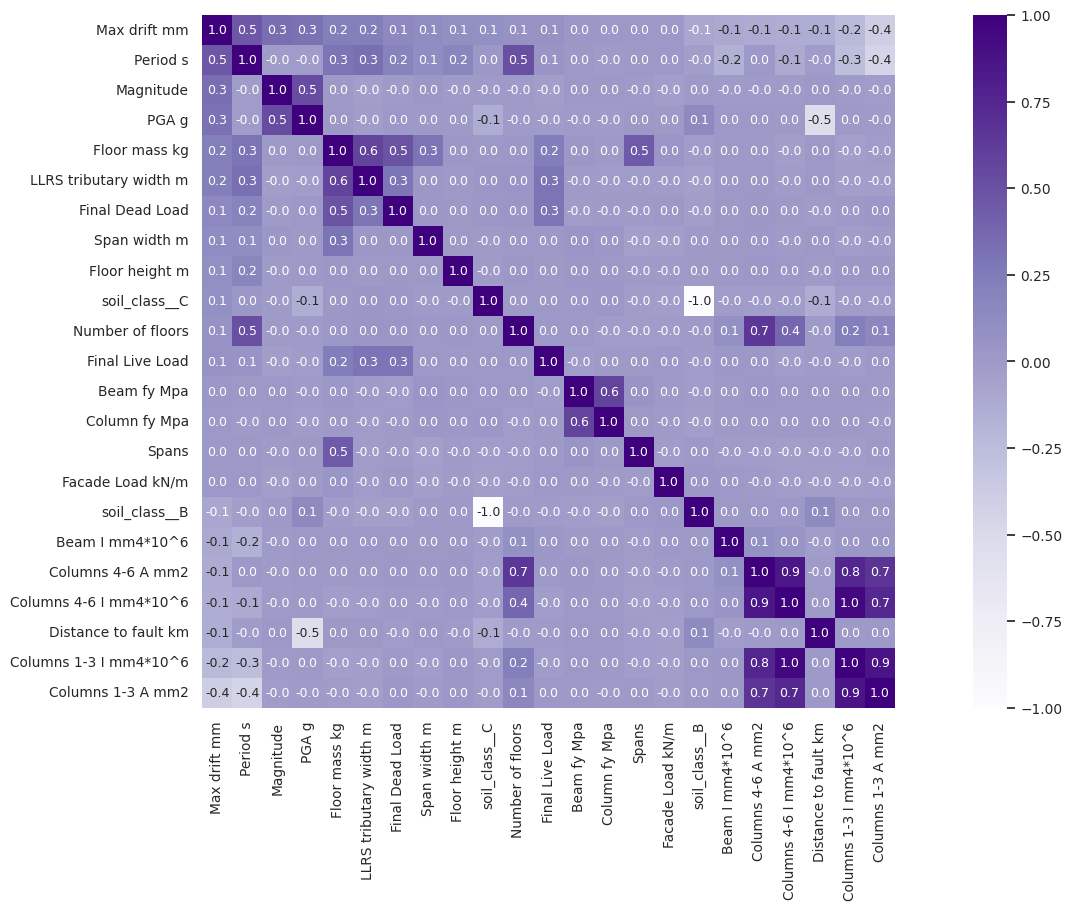

In [ ]:
corrmat = train_raw.corr()

plt.figure(figsize=(20, 9))
k=23
cols = corrmat.nlargest(k, 'Max drift mm')['Max drift mm'].index
cm = np.corrcoef(train_raw[cols].values.T)
sns.set(font_scale=0.9)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.1f', annot_kws={'size': 9}, 
                 yticklabels=cols.values, xticklabels=cols.values, cmap="Purples")
plt.show()

In [ ]:
target = train_raw['Max drift mm']
features = train_raw.drop(['Max drift mm'], axis=1)
target.shape, features.shape

((2922,), (2922, 22))

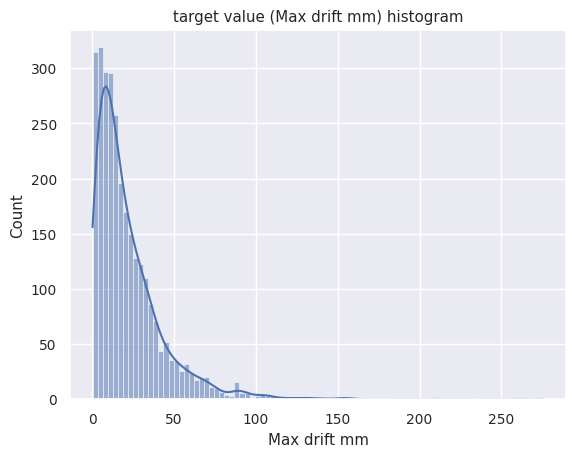

In [ ]:
plt.title('target value (Max drift mm) histogram')
sns.histplot(target, kde=True)
plt.show()

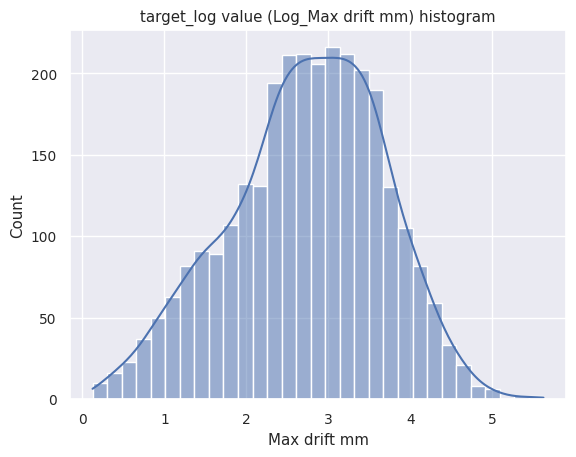

In [ ]:
plt.title('target_log value (Log_Max drift mm) histogram')

target_log = np.log1p(target)
sns.histplot(target_log , kde=True)
plt.show()

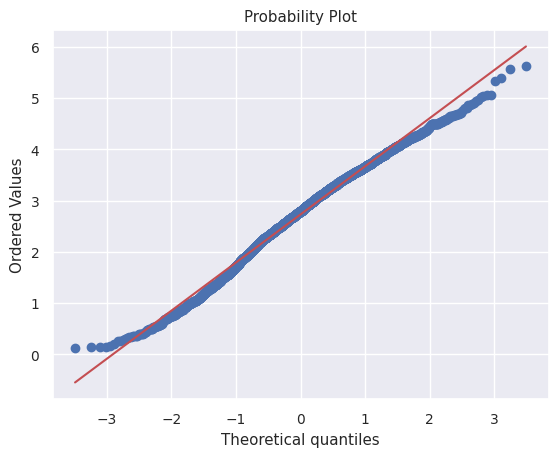

In [ ]:
from scipy.stats import probplot

plt.figure()
probplot(target_log, plot=plt)
plt.show()


In [ ]:
corr_rate_threshold = 0.90

cor_matrix = features.corr().abs()
cor_matrix

,Column fy Mpa,Beam fy Mpa,Columns 1-3 I mm4*10^6,Columns 4-6 I mm4*10^6,Columns 1-3 A mm2,Columns 4-6 A mm2,Beam I mm4*10^6,Spans,Number of floors,Floor height m,...,Floor mass kg,Facade Load kN/m,PGA g,Magnitude,Distance to fault km,Period s,Final Dead Load,Final Live Load,soil_class__B,soil_class__C
Column fy Mpa,1.000000,0.573832,0.003962,0.007098,0.001822,0.001473,0.002826,0.014899,0.013799,0.019965,...,0.003502,0.002008,0.012934,0.013316,0.015441,0.004823,0.001287,0.005581,0.031087,0.031087
Beam fy Mpa,0.573832,1.000000,0.011491,0.017680,0.007527,0.025588,0.002976,0.048678,0.014238,0.025509,...,0.026377,0.005080,0.004535,0.020618,0.007836,0.010707,0.009390,0.008653,0.021111,0.021111
Columns 1-3 I mm4*10^6,0.003962,0.011491,1.000000,0.952240,0.868276,0.757750,0.026972,0.016663,0.228410,0.024413,...,0.032399,0.029558,0.000155,0.007796,0.007386,0.252154,0.005844,0.012838,0.010309,0.010309
Columns 4-6 I mm4*10^6,0.007098,0.017680,0.952240,1.000000,0.736990,0.855271,0.047384,0.025825,0.372658,0.020804,...,0.027580,0.020491,0.003356,0.003068,0.002354,0.109842,0.004981,0.016771,0.016802,0.016802
Columns 1-3 A mm2,0.001822,0.007527,0.868276,0.736990,1.000000,0.670168,0.025388,0.000492,0.148588,0.025659,...,0.008438,0.017522,0.000456,0.009507,0.017253,0.446886,0.029432,0.017031,0.008311,0.008311
Columns 4-6 A mm2,0.001473,0.025588,0.757750,0.855271,0.670168,1.000000,0.087640,0.018120,0.650735,0.025944,...,0.003012,0.005328,0.008516,0.001305,0.002163,0.016018,0.025888,0.020230,0.018573,0.018573
Beam I mm4*10^6,0.002826,0.002976,0.026972,0.047384,0.025388,0.087640,1.000000,0.009739,0.090957,0.014283,...,0.013126,0.017855,0.017280,0.007534,0.022716,0.163076,0.013180,0.028425,0.015289,0.015289
Spans,0.014899,0.048678,0.016663,0.025825,0.000492,0.018120,0.009739,1.000000,0.008767,0.002406,...,0.452765,0.010404,0.015155,0.003224,0.017784,0.009799,0.001547,0.003029,0.016717,0.016717
Number of floors,0.013799,0.014238,0.228410,0.372658,0.148588,0.650735,0.090957,0.008767,1.000000,0.025968,...,0.030372,0.008250,0.002743,0.005595,0.006394,0.508639,0.032057,0.020816,0.002975,0.002975
Floor height m,0.019965,0.025509,0.024413,0.020804,0.025659,0.025944,0.014283,0.002406,0.025968,1.000000,...,0.024016,0.002082,0.003835,0.002487,0.005647,0.172628,0.011931,0.000588,0.002969,0.002969


In [ ]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
upper_tri

,Column fy Mpa,Beam fy Mpa,Columns 1-3 I mm4*10^6,Columns 4-6 I mm4*10^6,Columns 1-3 A mm2,Columns 4-6 A mm2,Beam I mm4*10^6,Spans,Number of floors,Floor height m,...,Floor mass kg,Facade Load kN/m,PGA g,Magnitude,Distance to fault km,Period s,Final Dead Load,Final Live Load,soil_class__B,soil_class__C
Column fy Mpa,NaN,0.573832,0.003962,0.007098,0.001822,0.001473,0.002826,0.014899,0.013799,0.019965,...,0.003502,0.002008,0.012934,0.013316,0.015441,0.004823,0.001287,0.005581,0.031087,0.031087
Beam fy Mpa,NaN,NaN,0.011491,0.017680,0.007527,0.025588,0.002976,0.048678,0.014238,0.025509,...,0.026377,0.005080,0.004535,0.020618,0.007836,0.010707,0.009390,0.008653,0.021111,0.021111
Columns 1-3 I mm4*10^6,NaN,NaN,NaN,0.952240,0.868276,0.757750,0.026972,0.016663,0.228410,0.024413,...,0.032399,0.029558,0.000155,0.007796,0.007386,0.252154,0.005844,0.012838,0.010309,0.010309
Columns 4-6 I mm4*10^6,NaN,NaN,NaN,NaN,0.736990,0.855271,0.047384,0.025825,0.372658,0.020804,...,0.027580,0.020491,0.003356,0.003068,0.002354,0.109842,0.004981,0.016771,0.016802,0.016802
Columns 1-3 A mm2,NaN,NaN,NaN,NaN,NaN,0.670168,0.025388,0.000492,0.148588,0.025659,...,0.008438,0.017522,0.000456,0.009507,0.017253,0.446886,0.029432,0.017031,0.008311,0.008311
Columns 4-6 A mm2,NaN,NaN,NaN,NaN,NaN,NaN,0.087640,0.018120,0.650735,0.025944,...,0.003012,0.005328,0.008516,0.001305,0.002163,0.016018,0.025888,0.020230,0.018573,0.018573
Beam I mm4*10^6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009739,0.090957,0.014283,...,0.013126,0.017855,0.017280,0.007534,0.022716,0.163076,0.013180,0.028425,0.015289,0.015289
Spans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008767,0.002406,...,0.452765,0.010404,0.015155,0.003224,0.017784,0.009799,0.001547,0.003029,0.016717,0.016717
Number of floors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025968,...,0.030372,0.008250,0.002743,0.005595,0.006394,0.508639,0.032057,0.020816,0.002975,0.002975
Floor height m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.024016,0.002082,0.003835,0.002487,0.005647,0.172628,0.011931,0.000588,0.002969,0.002969


In [ ]:
# Drop columns with higher correlation than rate_corr_threshold

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= corr_rate_threshold)]
print(to_drop)

['Columns 4-6 I mm4*10^6', 'soil_class__C']


In [ ]:
selected_features = features.drop(features[to_drop], axis=1)
selected_features.head()

,Column fy Mpa,Beam fy Mpa,Columns 1-3 I mm4*10^6,Columns 1-3 A mm2,Columns 4-6 A mm2,Beam I mm4*10^6,Spans,Number of floors,Floor height m,Span width m,LLRS tributary width m,Floor mass kg,Facade Load kN/m,PGA g,Magnitude,Distance to fault km,Period s,Final Dead Load,Final Live Load,soil_class__B
0,275.0,235.0,16.73,3877.0,3142.0,1119.0,5.0,4.0,4.0,8.0,17.5,271342.1700,3.0,0.171,6.00,17.28,5.178486,10.5,7.0,0.0
1,235.0,235.0,229.30,12437.0,11253.0,117.7,3.0,6.0,4.0,8.0,20.0,196435.0080,4.0,0.150,6.33,18.96,4.539964,12.0,8.0,0.0
2,275.0,235.0,276.90,13347.0,0.0,117.7,6.0,3.0,4.0,5.0,10.0,218011.8600,1.0,0.171,6.00,17.28,1.412026,15.0,10.0,0.0
3,235.0,235.0,10.33,3142.0,2534.0,920.8,6.0,6.0,3.0,5.0,4.0,43031.3400,1.0,0.283,7.28,19.74,2.490511,4.0,10.0,0.0
4,355.0,355.0,330.90,14276.0,0.0,920.8,3.0,2.0,4.0,6.0,2.0,25419.0816,4.0,0.171,6.00,17.28,0.313426,8.0,4.0,0.0


In [ ]:
features = selected_features.copy()

In [ ]:
from sklearn.model_selection import train_test_split, KFold

kf = KFold(n_splits =30, shuffle = True, random_state = 2304)
for tr_idx, te_idx in kf.split(features):
    X_train, X_val = features.iloc[tr_idx], features.iloc[te_idx]
    y_train, y_val = target_log.iloc[tr_idx], target_log.iloc[te_idx]
    
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((2825, 20), (97, 20), (2825,), (97,))

In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline(steps=[('impute', SimpleImputer(strategy='mean'))])
num_pipeline

Pipeline(steps=[('impute', SimpleImputer())])

In [ ]:
def prepare_model(algorithm, X_train, y_train): 
    model = Pipeline(steps=[('preprocessing', num_pipeline),('algorithm', algorithm)])
    model.fit(X_train, y_train)
    return model

In [ ]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error

algorithms = [AdaBoostRegressor()]

In [ ]:
names = []
times = []
mse = []
rmse = []

for algorithm in algorithms:
    name = type(algorithm).__name__
    names.append(name)
    start_time = time.time()
    model = prepare_model(algorithm, X_train, y_train)
    pred = model.predict(X_val)
    end_time = time.time()
    times.append(end_time - start_time)
    mse.append(mean_squared_error(y_val, pred))
    rmse.append(np.sqrt(mean_squared_error(y_val, pred)))

print('Regression Results in Algorithms') 
results_dict = {'Algorithm': names, 'MSE': mse, 'RMSE': rmse, 'Time': times}
pd.DataFrame(results_dict).sort_values(by='RMSE', ascending=1)

# RandomForestRegressor is confirmed as the best model.

Regression Results in Algorithms


,Algorithm,MSE,RMSE,Time
0,AdaBoostRegressor,0.106033,0.325628,0.395195


In [ ]:
# 1st model
rfr = RandomForestRegressor()

rfr.fit(X_train, y_train)

print(rfr.score(X_train, y_train))
print(rfr.score(X_val, y_val))

rfr_pred = rfr.predict(X_val)
rfr_rmse = np.sqrt(mean_squared_error(y_val, rfr_pred))
print(rfr_rmse)

0.9945228984718949
0.9646848129265885
0.17259250094453998


<Axes: ylabel='Max drift mm'>

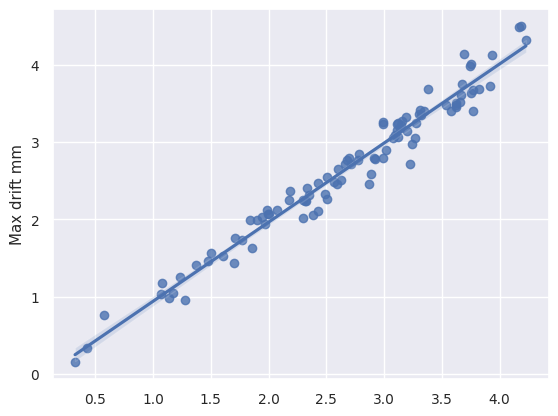

In [ ]:
sns.regplot(x = rfr_pred, y = y_val)

In [ ]:
# 2nd model
br = BaggingRegressor(random_state=2304)

br.fit(X_train, y_train)
print(br.score(X_train, y_train))
print(br.score(X_val, y_val))

br_pred = br.predict(X_val)
br_rmse = np.sqrt(mean_squared_error(y_val, br_pred))
print(br_rmse)

0.9915723389558425
0.9590995004241304
0.18574001346018784


In [ ]:
# 3rd model
gbr = GradientBoostingRegressor(random_state=2304)

gbr.fit(X_train, y_train)
print(gbr.score(X_train, y_train))
print(gbr.score(X_val, y_val))

gbr_pred = gbr.predict(X_val)
gbr_rmse = np.sqrt(mean_squared_error(y_val, gbr_pred))
print(gbr_rmse)

0.9495500360394395
0.9387281987941568
0.22733771475795447


In [ ]:
# 4th model
etr = ExtraTreeRegressor(random_state=2304)

etr.fit(X_train, y_train)
print(etr.score(X_train, y_train))
print(etr.score(X_val, y_val))

etr_pred = etr.predict(X_val)
etr_rmse = np.sqrt(mean_squared_error(y_val, etr_pred))
print(etr_rmse)

1.0
0.7862770964846094
0.4245870061972702


In [ ]:
from sklearn.ensemble import StackingRegressor

In [ ]:
stack_models = [('RandomForestRegressor', rfr), 
                ('BaggingRegressor', br),                 
                ('GradientBoostingRegressor', gbr)]

In [ ]:
stack = StackingRegressor(stack_models)
stack.fit(X_train, y_train)
stack_pred = stack.predict(X_val)

print(stack.score(X_train, y_train))
print(stack.score(X_val, y_val))

stack_pred = stack.predict(X_val)
stack_rmse = np.sqrt(mean_squared_error(y_val, stack_pred))
print(stack_rmse)

0.9932924626255014
0.9661657939288839
0.16893481532583965


In [ ]:
preds = 0.8*rfr_pred + 0.15*br_pred + 0.05*gbr_pred

rmse = np.sqrt(mean_squared_error(y_val, preds))
rmse

0.1725492420427944

<Axes: ylabel='Max drift mm'>

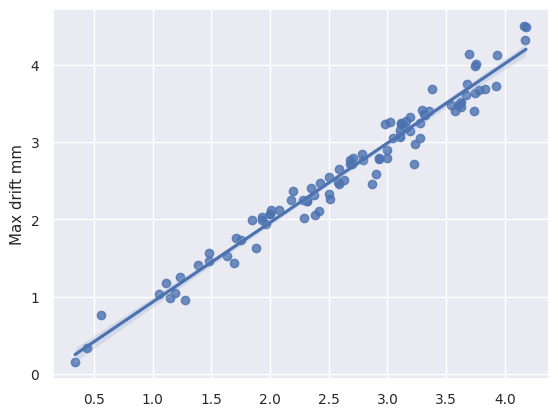

In [ ]:
sns.regplot(x = preds, y = y_val)

In [ ]:
features.shape, target_log.shape

((2922, 20), (2922,))

In [ ]:
test = test_raw.drop(['Columns 4-6 I mm4*10^6', 'soil_class__C'], axis=1)
test.shape

(325, 20)

In [ ]:
features = scaler.fit_transform(features)
test = scaler.transform(test)

In [ ]:

abr = AdaBoostRegressor()
abr.fit(features, target_log)
abr_pred = abr.predict(test)


print(abr.score(features, target_log))


abr_pred[:10]

0.8645185131892307


array([1.73219714, 0.92924482, 3.85248414, 2.59182009, 1.19203215,
       3.43287139, 3.81383517, 2.71064083, 2.96781902, 3.57214812])

In [ ]:
br.fit(features, target_log)

print(br.score(features, target_log))

br_pred = br.predict(test)
br_pred[:10]

0.9917542189726711


array([1.699815  , 0.26219119, 3.74626821, 2.72402502, 1.04216506,
       3.82013666, 4.25976536, 2.60777644, 3.47671054, 3.36457941])

In [ ]:
gbr.fit(features, target_log)

print(gbr.score(features, target_log))

gbr_pred = gbr.predict(test)
gbr_pred[:10]

0.9489479060917317


array([1.64421268, 0.32627609, 3.69953287, 2.96449622, 1.02727079,
       3.59953123, 4.36911698, 2.57210047, 3.2709181 , 3.4464416 ])

In [ ]:
preds = 0.8*rfr_pred + 0.15*br_pred + 0.05*gbr_pred 
preds[:10]

ValueError: ignored

In [ ]:
stack_models = [('RandomForestRegressor', rfr), ('BaggingRegressor', br), ('GradientBoostingRegressor', gbr)]

In [ ]:
stack = StackingRegressor(stack_models)
stack.fit(features, target_log)

print(stack.score(features, target_log))
# better

0.9944028126890898


In [ ]:
stack_pred = stack.predict(test)

stack_pred[:10]

array([1.7194767 , 0.17612297, 3.73481124, 2.84934552, 1.02351266,
       3.88518191, 4.3584761 , 2.587277  , 3.42133057, 3.40855766])

In [ ]:
Max_drift_mm = np.expm1(stack_pred)
Max_drift_mm[:10]

array([ 4.58160687,  0.1925847 , 40.88011959, 16.2764711 ,  1.78295318,
       47.67579639, 77.13796942, 12.29352404, 29.61011679, 29.22162305])

In [ ]:
submission = pd.DataFrame({'Index': test_raw_index.index, 'Max drift mm': np.expm1(abr_pred)})
submission.to_csv('submission_2.csv', index=False)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# 讀取訓練資料並做前處理
train_raw = pd.read_csv('train.csv')
target = np.log1p(train_raw['Max drift mm'])
features = train_raw.drop(['Max drift mm'], axis=1)
selected_features = features.drop(features[to_drop], axis=1)

# 切分訓練集與驗證集
X_train, X_val, y_train, y_val = train_test_split(selected_features, target, test_size=0.2, random_state=42)

# 標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# 讀取測試資料並做前處理
test_raw = pd.read_csv('test.csv')
test = test_raw.drop(['Columns 4-6 I mm4*10^6', 'soil_class__C'], axis=1)
test = scaler.transform(test)

# 訓練 RandomForestRegressor 模型
rfr = RandomForestRegressor(random_state=2304)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_val)
rfr_test_pred = rfr.predict(test)

# 訓練 BaggingRegressor 模型
br = BaggingRegressor(random_state=2304)
br.fit(X_train, y_train)
br_pred = br.predict(X_val)
br_test_pred = br.predict(test)

# 訓練 AdaBoostRegressor 模型
abr = AdaBoostRegressor(random_state=2304)
abr.fit(X_train, y_train)
abr_pred = abr.predict(X_val)
abr_test_pred = abr.predict(test)

# 計算加權預測結果
preds = 0.1*rfr_pred + 0.1*br_pred + 0.8*abr_pred
rmse = np.sqrt(mean_squared_error(y_val, preds))
print(rmse)

# 對測試集做加權預測
test_preds = 0.1*rfr_test_pred + 0.1*br_test_pred + 0.8*abr_test_pred

# 轉換回原始的目標變量的範圍
Max_drift_mm = np.expm1(test_preds)

# 保存預測結果到 submission.csv
submission = pd.DataFrame({'Index': test_raw_index.index, 'Max drift mm': Max_drift_mm})
submission.to_csv('submission8.csv', index=False)

0.3155599852114362
